# Real time face mask detector 

In [1]:
#importing dependencies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D,Dropout,Flatten,Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

# Learning parameters and specifying directory

In [3]:
#Learning rate
learning_rate=0.0001
#Epochs
epochs=30
#Batch Size
batch_size=32
#Source directory
src_dir=r'C:/Users/PROMIT/Desktop/contents/Face-Mask-Detection/dataset/train'
#Classes
categories=["with_mask","without_mask"]

# Loading the images and labeling

In [4]:
images=[]
classes=[]
for item in categories:
    path=src_dir+'/'+item
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        image=load_img(img_path,target_size=(224,224))
        image=img_to_array(image)
        image=preprocess_input(image)#preprocessing the image
        images.append(image)
        classes.append(item)
#one hot encoding of target variables       
lb=LabelBinarizer()
classes=lb.fit_transform(classes)
classes=to_categorical(classes)
images=np.array(images,dtype="float32")
classes=np.array(classes)#converting into numpy array

C:\Users\PROMIT\anaconda3\envs\tensorflow\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


# Splitting train and test dataset

In [5]:

X_train,X_test,Y_train,Y_test=train_test_split(images,classes,test_size=0.2,stratify=classes,random_state=42)

# Image augmentation

In [6]:
#image augmentation
aug=ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.20,
    horizontal_flip=True,
    fill_mode="nearest"
)
    
  


# Transfer Learning

In [7]:
#Loading MobileNetV2 as the base model  with weights that of pre trained imagenet model
baseModel=MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

In [ ]:
#Adding further layers to the basemodel

In [8]:
#Output of baseModel
face_model=baseModel.output
face_model=AveragePooling2D(pool_size=(7,7))(face_model)#Average pooling
face_model=Flatten(name="flatten")(face_model)#Flattening to obtain 1-D array
#Adding hidden layers
headModel=Dense(64,activation="relu")(face_model)
headModel=Dense(128,activation="relu")(face_model)
headModel=Dense(256,activation="relu")(face_model)

face_model=Dropout(0.5)(face_model)#Dropout to prevent overfitting
face_model=Dense(2,activation="softmax")(face_model)
#Appending input and output
model=Model(inputs=baseModel.input,outputs=face_model)
#Preventing further training in pre-trained baseModel
for layer in baseModel.layers:
    layer.trainable=False
opt=RMSprop(learning_rate=learning_rate,decay=learning_rate/epochs)


# Model Architecture

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [10]:
#Compiling our model
model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [11]:
#Training the model
history=model.fit(
    aug.flow(X_train,Y_train,batch_size=batch_size),

    validation_data=(X_test,Y_test),
    epochs=epochs
)

Epoch 1/30
92/92 [==============================] - 167s 2s/step - loss: 0.5952 - accuracy: 0.7048 - val_loss: 0.2927 - val_accuracy: 0.9183
Epoch 2/30
92/92 [==============================] - 174s 2s/step - loss: 0.3450 - accuracy: 0.8630 - val_loss: 0.1747 - val_accuracy: 0.9578
Epoch 3/30
92/92 [==============================] - 108s 1s/step - loss: 0.2326 - accuracy: 0.9117 - val_loss: 0.1240 - val_accuracy: 0.9673
Epoch 4/30
92/92 [==============================] - 102s 1s/step - loss: 0.1832 - accuracy: 0.9291 - val_loss: 0.0967 - val_accuracy: 0.9755
Epoch 5/30
92/92 [==============================] - 98s 1s/step - loss: 0.1419 - accuracy: 0.9434 - val_loss: 0.0810 - val_accuracy: 0.9741
Epoch 6/30
92/92 [==============================] - 97s 1s/step - loss: 0.1250 - accuracy: 0.9543 - val_loss: 0.0701 - val_accuracy: 0.9768
Epoch 7/30
92/92 [==============================] - 102s 1s/step - loss: 0.1033 - accuracy: 0.9622 - val_loss: 0.0629 - val_accuracy: 0.9796
Epoch 8/30
92/9

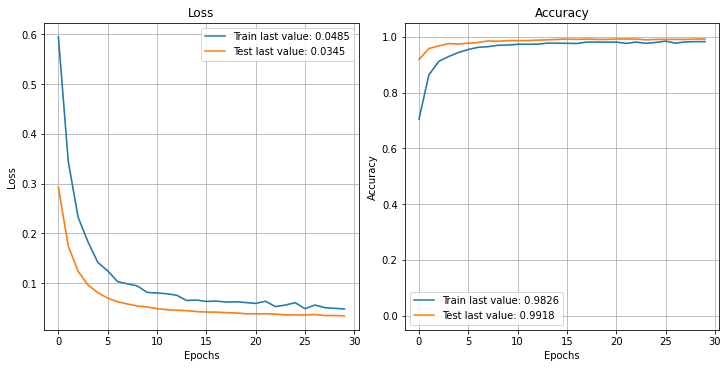

In [13]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
plot_history(history)
plt.show()